In [1]:
# MAKE SURE TO START ml_kernel if you want to do ML stuff
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#The sklearn.preprocessing package provides several common utility functions and 
#transformer classes to change raw feature vectors into a 
#representation that is more suitable for the downstream estimators.

In [4]:
# basically transformers help with transforming our initial pandas dataframe to some array that is suitable for estimators
# we can encapsulate these transformers in pipelines.
# As a first step, lets just try using a transformer

# honestly though so you first check some stuff with pandas, 
# but at some point you put everything into transformer classes
# even feature selection can go into transformers I suppose
# but honestly do you want to put feature selection 
# in transformer classes?

# I suppose so, why not. 
# could also use spark dataframes for this?

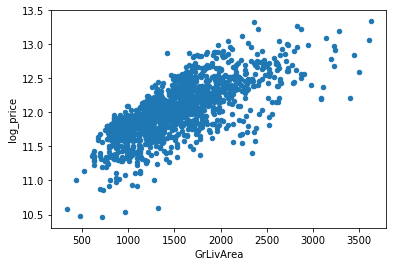

In [5]:
# OverallQual shows a pretty high correlation with saleprice. 
# Note however that it is mostly the 
# very low relation between lot area and sale price. It seems to be pretty high with 
# I assume that neighborhood should also be pretty good, but there are a lot of neighbourhoods

df_train = pd.read_csv('data/train.csv')
#col_list = list(df_train.columns.values)
df_train['log_price'] = np.log(df_train['SalePrice'])
df_train['log_lot_area'] = np.log(df_train['LotArea'])
df_train = df_train.loc[df_train['GrLivArea'] < 4000,:]
df_train.plot(kind = 'scatter',x = 'GrLivArea',y = 'log_price')

In [18]:
col_list = list(df_train.columns.values)



In [19]:
col_list

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10808e668>]],
      dtype=object)

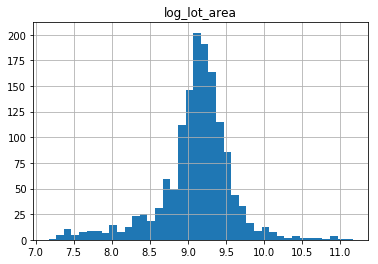

In [19]:
# log transform makes it look normal. Should maybe help in predictions.
df_train.hist('log_lot_area',bins = 40)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x109f4a588>,
      dtype=object)

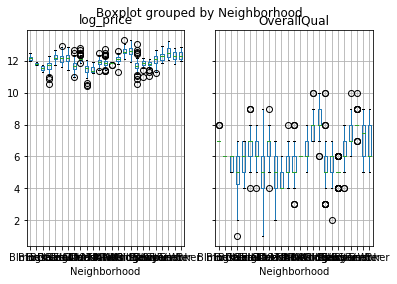

In [28]:
df_train.boxplot(column = ['log_price','OverallQual'], by = 'Neighborhood')

In [43]:
null_dict = {col_name:len(df_train.loc[pd.isnull(df_train[col_name]),:]) for col_name in df_train.columns}

In [44]:
null_dict

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1365,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

In [33]:
# Idea for now: start with an average. Compute the RMSE. Then use Linear Regression using one variable (overallqual)
# and honestly, just go from there. 
avg_sale_price = df_train.agg({'SalePrice': {'mean': lambda x: np.mean(x)}}).iloc[0]

/Users/maxthone/.virtualenv/ml_venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
